# CSCI 443 Lecture 12 Notes

$$f(x; \alpha) = 2 \phi(x) \Phi(\alpha x)$$

When $\alpha=0$, we get

$$f(x; \alpha) = 2 \phi(x) \Phi(0) = 2 \phi(x) \cdot \frac{1}{2} = \phi(x)$$

/Users/dave/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/dave/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


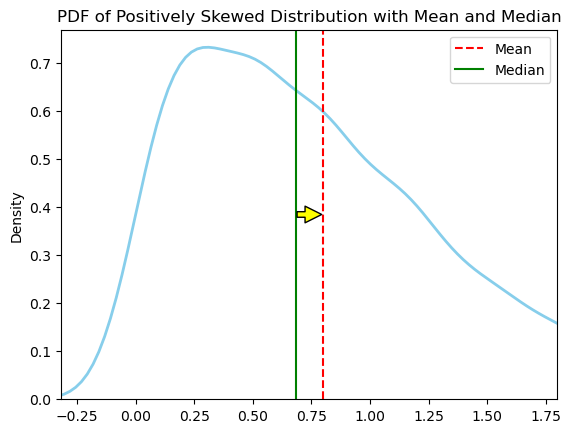

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm
import seaborn as sns

# Generate a skewed distribution
a = 10  # Skewness parameter
data_skewed = skewnorm.rvs(a, size=10000)

# Calculate mean and median
mean_skewed = np.mean(data_skewed)
median_skewed = np.median(data_skewed)

# Plot PDF
sns.kdeplot(data_skewed, color='skyblue', linewidth=2)
plt.axvline(mean_skewed, color='r', linestyle='--', label='Mean')
plt.axvline(median_skewed, color='g', linestyle='-', label='Median')

# Arrow in the middle of the y dimension
ymin, ymax = plt.ylim()
arrow_y_position = (ymin + ymax) / 2
plt.annotate('', xy=(mean_skewed, arrow_y_position), xytext=(median_skewed, arrow_y_position),
             arrowprops=dict(facecolor='yellow', shrink=0.05))

# Zoom in for substantial distance between mean and median
plt.xlim(median_skewed - 1, mean_skewed + 1)

plt.title('PDF of Positively Skewed Distribution with Mean and Median')
plt.legend()
plt.show()


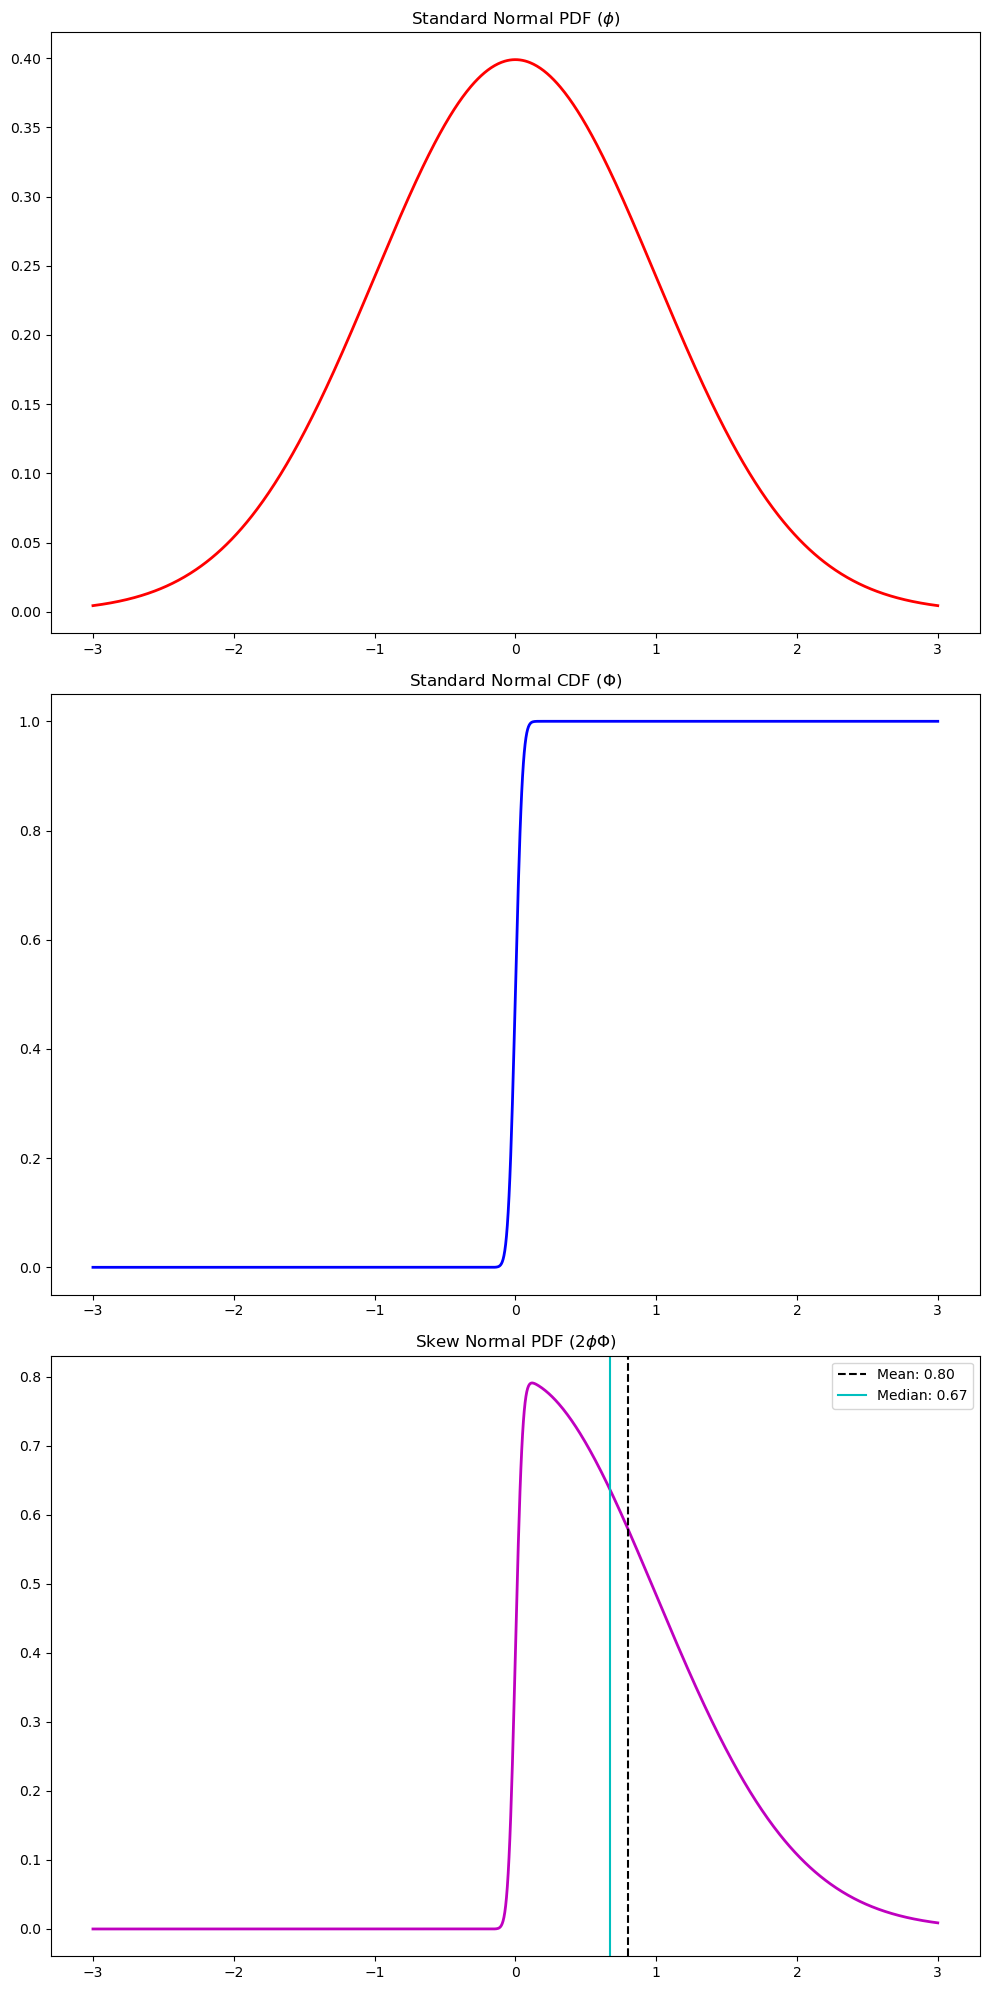

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skewnorm

# Define the range for x
x = np.linspace(-3, 3, 1000)


# Parameters for the skew normal distribution
alpha = 25  # Skewness parameter
loc = 0    # Location (mean) of the distribution
scale = 1  # Scale (standard deviation) of the distribution

# Standard normal PDF and CDF
phi_pdf = norm.pdf(x)
phi_cdf = norm.cdf(alpha*x)

# Skew normal distribution object
dist = skewnorm(a=alpha, loc=loc, scale=scale)

# Skew normal PDF
skewnorm_pdf = dist.pdf(x)

# Calculate the mean and median
mean = dist.mean()
median = dist.ppf(0.5)

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 20))

# Standard Normal PDF
axs[0].plot(x, phi_pdf, 'r-', lw=2)
axs[0].set_title('Standard Normal PDF ($\phi$)')

# Standard Normal CDF
axs[1].plot(x, phi_cdf, 'b-', lw=2)
axs[1].set_title('Standard Normal CDF ($\Phi$)')

# # Multiplication of phi PDF and Phi CDF
# axs[2].plot(x, phi_pdf * phi_cdf, 'g-', lw=2)
# axs[2].set_title('Multiplication of $\phi$ and $\Phi$')

# Skew Normal PDF
axs[2].plot(x, skewnorm_pdf, 'm-', lw=2)
axs[2].axvline(x=mean, color='k', linestyle='--', label=f'Mean: {mean:.2f}')
axs[2].axvline(x=median, color='c', linestyle='-', label=f'Median: {median:.2f}')
axs[2].set_title('Skew Normal PDF ($2\phi\Phi$)')
axs[2].legend()

plt.tight_layout()
plt.savefig('skewnorm.png')  # Saves the plot as a PNG file

plt.show()



## Student t-distribution


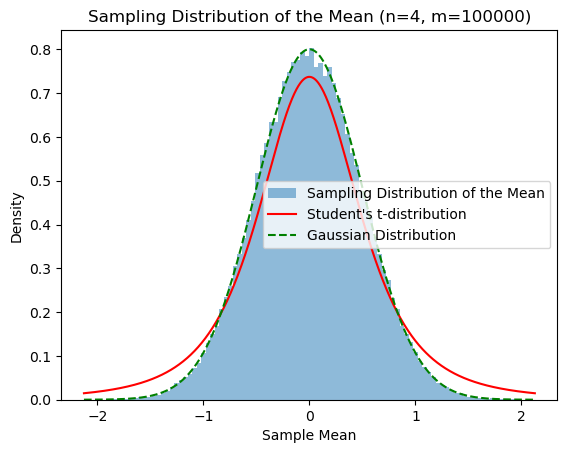

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm

def plot_sampling_distribution(m, n):
    # Generate m sample means from n samples
    population_mu = 0  # Population mean
    population_sigma = 1  # Population standard deviation
    sample_means = [np.mean(np.random.normal(population_mu, population_sigma, n)) for _ in range(m)]
    
    # Calculate standard error of the mean
    stderr = population_sigma / np.sqrt(n)
    mean_of_means = np.mean(sample_means)
    sample_stddev = np.std(sample_means, ddof=1)
    
    # Plot histogram of sample means
    plt.hist(sample_means, bins=100, density=True, alpha=0.5, label='Sampling Distribution of the Mean')
    
    # Overlay Student's t-distribution
    df = n - 1  # Degrees of freedom
    x = np.linspace(min(sample_means), max(sample_means), 1000)
    plt.plot(x, t.pdf(x, df, loc=population_mu, scale=sample_stddev), 'r-', label="Student's t-distribution")
    
    # Overlay Gaussian distribution
    plt.plot(x, norm.pdf(x, loc=population_mu, scale=sample_stddev), 'g--', label='Gaussian Distribution')
    
    # Plot details
    plt.title(f'Sampling Distribution of the Mean (n={n}, m={m})')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Example usage
plot_sampling_distribution(m=100000, n=4)  # Small n


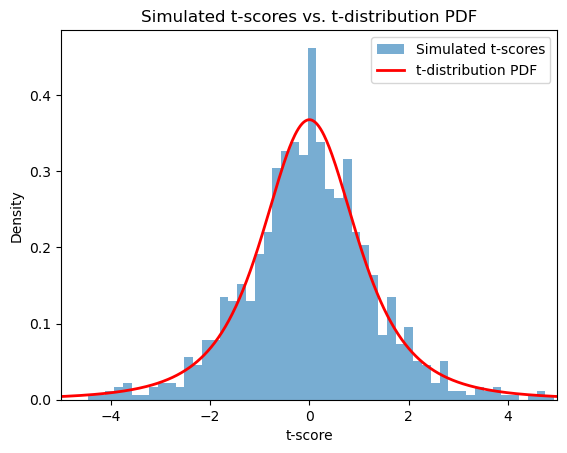

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Parameters
mu = 0  # Population mean (for demonstration, assuming it's known)
sigma = 1  # Population standard deviation
n = 4  # Sample size
m = 1000  # Number of samples

# Generate t-scores from m samples
t_scores = []
for _ in range(m):
    sample = np.random.normal(mu, sigma, n)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    t_score = (sample_mean - mu) / (sample_std / np.sqrt(n))
    t_scores.append(t_score)

# Plotting the histogram of t-scores
plt.hist(t_scores, bins=100, density=True, alpha=0.6, label='Simulated t-scores')

# Plotting the PDF of the t-distribution for comparison
x = np.linspace(min(t_scores), max(t_scores), 1000)
plt.xlim(-5, 5)
plt.plot(x, t.pdf(x, df=n-1), 'r-', lw=2, label="t-distribution PDF")

plt.legend()
plt.title('Simulated t-scores vs. t-distribution PDF')
plt.xlabel('t-score')
plt.ylabel('Density')
plt.show()


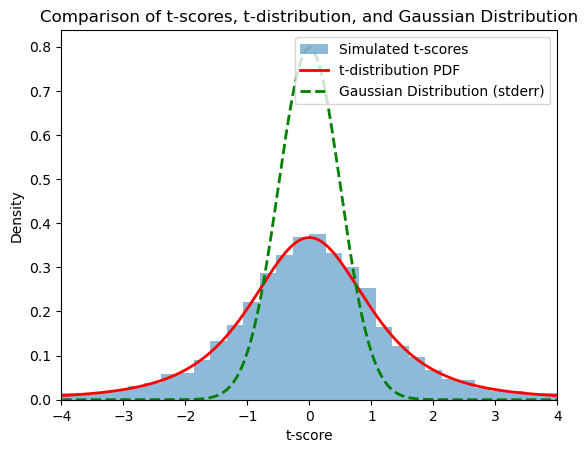

In [12]:
# Adjusting the code to fix the x range from -4 to 4 and overlay the PDF of a Gaussian with 0 mean and standard deviation set to the standard error

# Re-defining parameters
mu = 0  # Population mean
sigma = 1  # Population standard deviation
n = 4  # Sample size
m = 10000  # Number of samples
stderr = sigma / np.sqrt(n)  # Standard error of the mean

# Generate t-scores from m samples
t_scores = []
for _ in range(m):
    sample = np.random.normal(mu, sigma, n)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    t_score = (sample_mean - mu) / (sample_std / np.sqrt(n))
    t_scores.append(t_score)

# Fixed x range
x_fixed = np.linspace(-4, 4, 1000)

# Plotting the histogram of t-scores with fixed x range
plt.hist(t_scores, bins=30, density=True, alpha=0.5, range=(-4, 4), label='Simulated t-scores')

# Plotting the PDF of the t-distribution for comparison
plt.plot(x_fixed, t.pdf(x_fixed, df=n-1), 'r-', lw=2, label="t-distribution PDF")

# Plotting the PDF of the Gaussian distribution with mean=0 and std=stderr
plt.plot(x_fixed, norm.pdf(x_fixed, loc=0, scale=stderr), 'g--', lw=2, label='Gaussian Distribution (stderr)')

plt.xlim(-4, 4)
plt.legend()
plt.title('Comparison of t-scores, t-distribution, and Gaussian Distribution')
plt.xlabel('t-score')
plt.ylabel('Density')
plt.show()

# This code should demonstrate that the t-distribution more closely matches the histogram of the simulated t-scores than the Gaussian distribution does, especially for small n (n=4 in this case). The t-distribution accounts for the extra variability due to estimating the standard deviation from the sample, which is why it's expected to be a better fit for the histogram of t-scores from small samples.


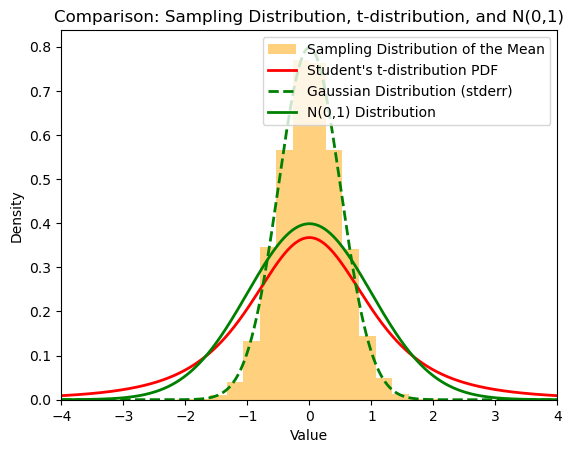

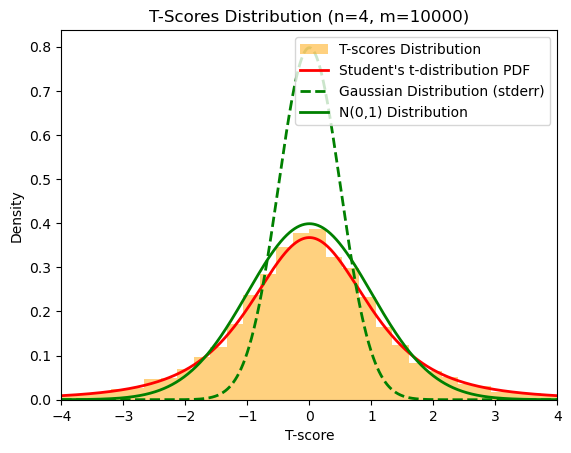

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm

def plot_sampling_distribution(m, n):
    # Generate m sample means from n samples drawn from N(0,1)
    sample_means = [np.mean(np.random.normal(0, 1, n)) for _ in range(m)]
    
    # Standard error of the mean for N(0,1)
    stderr = 1 / np.sqrt(n)
    
    # Fixed x range for plotting
    x_fixed = np.linspace(-4, 4, 1000)
    
    # Histogram of sample means with orange color
    plt.hist(sample_means, bins=30, density=True, alpha=0.5, range=(-4, 4), color='orange', label='Sampling Distribution of the Mean')
    
    # PDF of the t-distribution
    plt.plot(x_fixed, t.pdf(x_fixed, df=n-1), 'r-', lw=2, label="Student's t-distribution PDF")
    
    # PDF of the Gaussian distribution with mean=0 and std=stderr
    plt.plot(x_fixed, norm.pdf(x_fixed, 0, stderr), 'g--', lw=2, label='Gaussian Distribution (stderr)')
    
    # PDF of N(0,1) in green color to denote the underlying distribution
    plt.plot(x_fixed, norm.pdf(x_fixed, 0, 1), 'g-', lw=2, label='N(0,1) Distribution')
    
    plt.xlim(-4, 4)
    plt.legend()
    plt.title('Comparison: Sampling Distribution, t-distribution, and N(0,1)')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

# Example usage
plot_sampling_distribution(m=10000, n=4)
def plot_t_scores_distribution(m, n):
    # Placeholder for t-scores
    t_scores = []

    # Loop over m to generate t-scores
    for _ in range(m):
        sample = np.random.normal(0, 1, n)  # Draw a sample from N(0,1)
        sample_mean = np.mean(sample)  # Sample mean
        sample_std = np.std(sample, ddof=1)  # Sample standard deviation, ddof=1 for unbiased estimate
        t_score = (sample_mean - 0) / (sample_std / np.sqrt(n))  # Calculate t-score
        t_scores.append(t_score)
    
    # Fixed x range for plotting
    x_fixed = np.linspace(-4, 4, 1000)
    
    # Histogram of t-scores with orange color
    plt.hist(t_scores, bins=30, density=True, alpha=0.5, range=(-4, 4), color='orange', label='T-scores Distribution')
    
    # PDF of the t-distribution
    plt.plot(x_fixed, t.pdf(x_fixed, df=n-1), 'r-', lw=2, label="Student's t-distribution PDF")
    
    # PDF of the Gaussian distribution with mean=0 and std=stderr
    stderr = 1 / np.sqrt(n)  # Standard error for N(0,1)
    plt.plot(x_fixed, norm.pdf(x_fixed, 0, stderr), 'g--', lw=2, label='Gaussian Distribution (stderr)')
    
    # PDF of N(0,1) in green color to denote the underlying distribution
    plt.plot(x_fixed, norm.pdf(x_fixed, 0, 1), 'g-', lw=2, label='N(0,1) Distribution')
    
    plt.xlim(-4, 4)
    plt.legend()
    plt.title(f'T-Scores Distribution (n={n}, m={m})')
    plt.xlabel('T-score')
    plt.ylabel('Density')
    plt.show()

# Example usage
plot_t_scores_distribution(m=10000, n=4)
